# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `12`
* Students: `Arnaud Duvieusart, Franck Dessimoz, Omar Boujdaria and Adrien Vandebroucque`
* Dataset: `Flight Routes`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

In [2]:
def nodes_edges(adjacency):
    diag = adjacency.diagonal()
    n_edges =  (np.sum(adjacency) + np.sum(diag))/2
    
    return len(adjacency), n_edges

In [3]:
adjacency =  np.load('adj.npy')
n_nodes, n_edges = nodes_edges(adjacency)
print("Number of nodes", n_nodes)
print("Number of edges", n_edges)

Number of nodes 3330
Number of edges 19080.0


***Note that our original graph is directed. For the purpose of this milestone, we used the undirected version of our graph that we created in Milestone 1.***

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [4]:
%matplotlib inline

import random

import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [5]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    adjacency = np.zeros((n, n))
    #For each pair of nodes
    for node1 in range(n):
        for node2 in range(node1, n):
            #Add edge with probability p
            prob = np.random.rand(1) > (1 - p)
            if prob == 1:
                adjacency[node1, node2] = 1
                adjacency[node2, node1] = 1
        
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

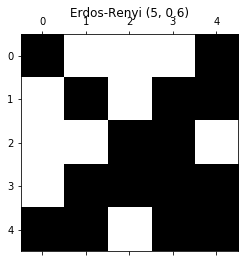

In [6]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

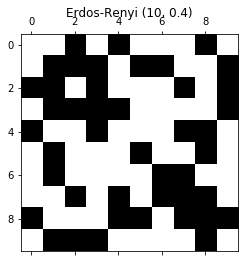

In [7]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [8]:
er = erdos_renyi(n_nodes, 2*n_edges/(n_nodes * (n_nodes-1)))
er_nodes, er_edges = nodes_edges(er)
er_edges

19217.0

***The number of nodes is obviously defined as the same number as in our graph.***
***Now for the edges: In our graph, there are 3330 nodes, so the number of possible links is n_links = 3330 * (3330-1) / 2 (see first milestone). Since in our graph, there are 19080 edges, we need to choose the probability of link attachment of our Erdos-Renyi model to be n_edges/n_links = 0.0034 (i.e. the attachment probability if our graph was constructed in the Erdos-Renyi model).***
***This way, in expectation, the number of edges in the Erdos-Renyi will also be 19080.***

### Question 3

Create a function that constructs a Barabási-Albert graph.

***For the BA model, we start with a complete graph that has m nodes. After that, we add one node at a time, and connect it to m existing nodes (following the BA procedure to choose the nodes).***

In [9]:
def barabasi_albert(n, m, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """

    #Create a connected graph with m nodes (complete graph)
    adjacency = np.zeros((n,n))
    adjacency[:m, :m] = 1
    np.fill_diagonal(adjacency, 0)
    
    degrees = np.zeros(n)
    degrees[:m] = m - 1


    for i in range(m, n):
        # choose m nodes to connect to with probability proportional to it's degree
        j = np.random.choice(n, m, p = degrees/sum(degrees), replace=False)
        for idx in j:
            degrees[idx] += 1
            adjacency[i][idx] += 1
            adjacency[idx][i] += 1
            degrees[i] += 1
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

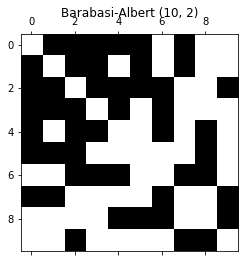

In [10]:
ba = barabasi_albert(10, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [11]:
n_nodes

3330

In [12]:
ba = barabasi_albert(n_nodes, 6)
ba_nodes, ba_edges = nodes_edges(ba)
ba_edges

19959.0

***The number of nodes is still n_nodes. For this type of graph we start with a complete graph with m nodes, i.e. m(m-1)/2 edges. After that, we add m edges for the remaining (n_nodes - m) nodes.
So now, our goal is to get 19 080 edges (n_edges), so we need to solve m(m-1)/2 + (n_nodes - m)m = n_edges. This yields m = 5.73. We retain m = 6***

***Below, we just ensure that our Erdos-Rényi graph is connected when computing the KL divergence. We reused our code from Milestone 1.***

In [13]:
def dfs(graph, node, visited):
    #mark current node as visited
    if visited[node] == 0:
        visited[node] = 1
    
    #find all possible links from current node and visit the unvisited nodes
    for i,n in enumerate(graph[node]):
        if n==1 and visited[i]==0:
            dfs(graph,i, visited)
    return visited

In [14]:
def connected_graph(adjacency, start = 0):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """

    
    #initialize the "visited" array
    visited = np.zeros(adjacency.shape[0])
    
    #perform dfs from the starting node
    visited = dfs(adjacency,start,visited)
    
    #if all nodes are visited, connected is true since we have a single CC
    connected = visited.mean()==1
    
    return connected

In [15]:
connected_graph(er)

True

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [16]:
print('For our original graph:' , n_edges, 'edges')
print('For Erdos-Renyi:', er_edges, 'edges')
print('For Barabasi-Albert:', ba_edges, 'edges')

For our original graph: 19080.0 edges
For Erdos-Renyi: 19217.0 edges
For Barabasi-Albert: 19959.0 edges


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [17]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    assert(len(p) == len(q))
    kl = 0
    
    #Compute the terms of the sum
    for i in range(len(p)):
        if(q[i]==0 or p[i]==0):continue
        kl += p[i]*np.log(p[i]/q[i])
    
    return kl

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

***First, we normalize the degree distribution and put them into bins so that there is no degree with probability zero. Note that we have two cases here, Erdos-Rényi and Barabasi-Albert.***

***As we will see in the plot of the degree distributions, our graph and the Erdos.Rényi have nothing to do with each other. Our graph follows a power law, and has sometimes degrees that go as high as 250. On the other side, the Erdos-Rényi model has max degree 25. In this case, we created linearly separated bins of size 2 until degree 24, and then we have a huge bin for all the degree that are higher.***

***For the BA model, it is very similar to our graph, so here we won't need to make very huge bins. Instead, since the distribution look very similar, we just create linearly separated bins (we tried different values for the width, and we found that bins of size 8 let us compute the KL divergence correctly).***

In [18]:
def normalize(adjacency, erdos=True):
    max_degree = 250
    bins_barabasi = [8*i for i in range(int (max_degree/4))]
    bins_erdos = [0, 2, 4, 6, 8, 10, 12, 14, 15, 16, 18, 20, 22, 24, 244]
    
    #Choose which bins to take
    if erdos:
        bins = bins_erdos
    else:
        bins = bins_barabasi
        
    #Compute frequencies with respect to the bins
    a = np.histogram(adjacency.sum(axis=0), bins = bins)[0]
    
    #Normalize
    a = a * 1.0 / a.sum()

    return a

***Note that when we compute the KL divergence, we always compute KL(our graph, another model). Indeed as specified in Wikipedia, KL(P, Q) is used when comparing distribution P to a reference distribution Q.***

***Here, the reference distributions will be the models we test, i.e. Erdos-Rényi and Barbasi-Albert***

In [19]:
# Original vs Erdős–Rényi

#normalize and put the degree distribution into bins
deg_dist_adj = normalize(adjacency)
deg_dist_erdos = normalize(er)

#Compute KL divergence
kl_div_er = kl_divergence(deg_dist_adj, deg_dist_erdos)

print('KL divergence in both direction between our matrix and the erdos-renyi model:', kl_div_er)

KL divergence in both direction between our matrix and the erdos-renyi model: 3.4773371192433165


In [20]:
# Original vs Barabási-Albert 

#normalize and put the degree distribution into bins
deg_dist_adj = normalize(adjacency, False)
deg_dist_bara = normalize(ba, False)

#Compute KL divergence
kl_div_ba = kl_divergence(deg_dist_adj, deg_dist_bara)

print('KL divergence in both direction between our matrix and the Barabasi albert model: ', kl_div_ba)

KL divergence in both direction between our matrix and the Barabasi albert model:  0.3055938736889059


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [21]:
# Compute the degree distribution of the matrix m
def compute_deg_dist(m):
    sum_ = m.sum(axis = 0).astype(int)
    frequ = np.bincount(sum_)
    frequ_norm = frequ*1.0/np.sum(frequ)
    return frequ_norm

In [22]:
#Compute the degree distribution for the 3 graphs (without bins this time)
q1 = compute_deg_dist(adjacency)

q2 = compute_deg_dist(ba)

q3 = compute_deg_dist(er)

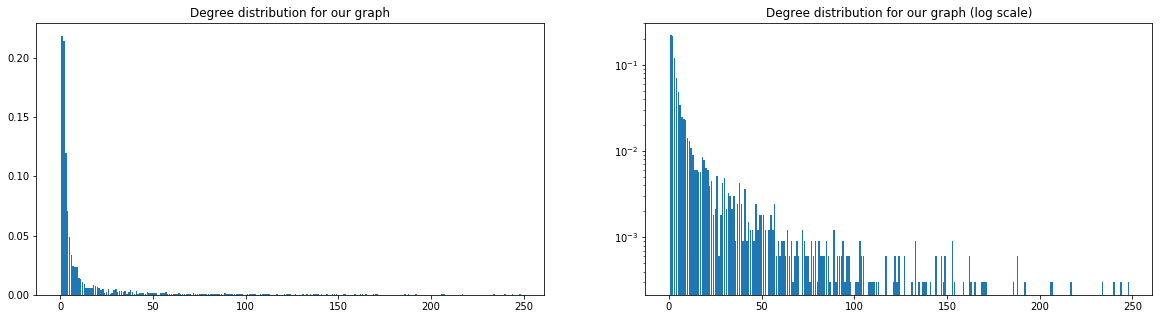

In [23]:
#Plot the degree distribution
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar(list(range(len(q1))), q1)
ax1.set_title('Degree distribution for our graph')
ax2.bar(list(range(len(q1))), q1, log = True)
ax2.set_title('Degree distribution for our graph (log scale)')
plt.show()

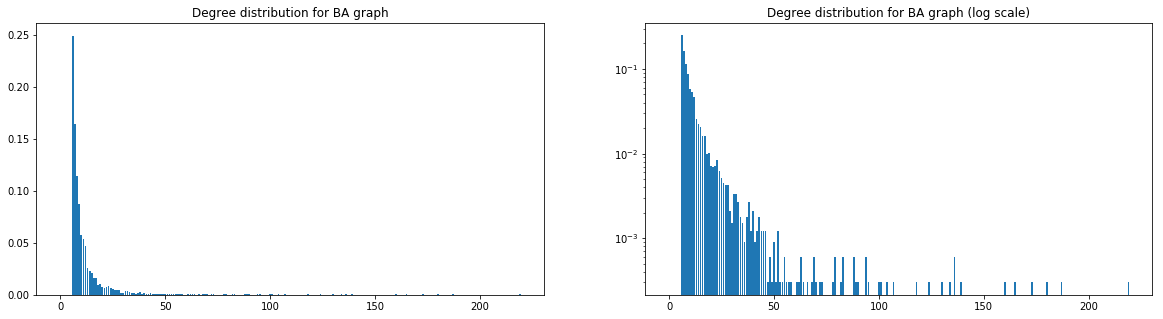

In [24]:
#Plot the degree distribution
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar(list(range(len(q2))), q2)
ax1.set_title('Degree distribution for BA graph')
ax2.bar(list(range(len(q2))), q2, log = True)
ax2.set_title('Degree distribution for BA graph (log scale)')
plt.show()

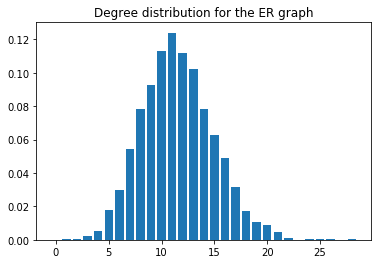

In [25]:
#Plot the degree distribution
plt.bar(list(range(len(q3))), q3)
plt.title('Degree distribution for the ER graph')
plt.show()

***It appears that both our graph and the Barabassi-Albert graph have degree distribution following a power law, when the Erdos-Renyi graph has a binomial degree distribution. It is consistent with our KL divergences, indeed for the BA model, the KL divergence is very low, very close to 0 (which would mean that the 2 distributions are identucal). On the other side, we can see that our graph and the ER model are way different since we get highier values for the KL divergence.***

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

***Given that we have the same number of nodes, edges and degrees are iids of the same distribution, this still doesn't guarantee that we have the same graph as their adjacency matrix  still  may be different. Think of 4 node a,b,c,d included in our total set of nodes, and the edges (a,b) and (c,d) between them in graph A. For Graph B, these edges can be different without changing the degree distribution or the total number of edges : (a,c) and (b,d).***

***More generally, the degree distribution are probabilities, so it doesn't represent one graph. It just says that some nodes are more likely to have certain degrees, but it doesn't fix the degrees of the nodes.***

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

***By lookging at the KL divergences in the question 7, we clearly see that the one of the Barabási-Albert graph is close to zero, which mean that this model would fit our network well. Since we were asked to choose another model from the two described above, we chose to focus on the degree distribution property of our model. The Barabási-Albert model has a degree distribution following a power law, like the preferential attachment model. Hence we chose the preferential attachment model to fit our network***

### Question 11

Explain (in short) how the chosen model works.

***The preferential attachment model was the one that seemed the most relevant given our dataset. Indeed the preferential attachment model will add new node and connect it to the existing nodes proportionnaly to their degree. In short this means that a new node is more probable to be connected to a node with high degree. This is observable in our dataset as a new airport is more likely to be connected to a big airport than to a small one.***

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [26]:
def preferential_attachement(n_nodes):
    adjacency = np.zeros((n_nodes, n_nodes))
    degrees = np.zeros(n_nodes)
    degrees_cumul = []
    
    #The 2 first nodes are linked
    adjacency[0][1] = 1
    adjacency[1][0] = 1
    
    degrees[0] = 1
    degrees[1] = 1
    
    degrees_cumul.append(0)
    degrees_cumul.append(1)
    
    #for every other node we inspect the probability to link this node to an existing one
    for i in range(2, n_nodes):
        neighboor = np.random.choice(degrees_cumul)
        adjacency[i][neighboor] = 1
        adjacency[neighboor][i] = 1
        degrees[i] += 1
        degrees[neighboor] += 1
        degrees_cumul.append(i)
        degrees_cumul.append(neighboor)

    return adjacency

In [27]:
adjacency_pref = preferential_attachement(n_nodes)

### Question 13

Check the properties you expected to be similar, and compare to your network.

***The property we want to be similar is the degree distribution***

In [28]:
deg_dist_adj = compute_deg_dist(adjacency)

In [29]:
deg_dist_pref = compute_deg_dist(adjacency_pref)

***We plot the two degree distributions, to compare graphically.***

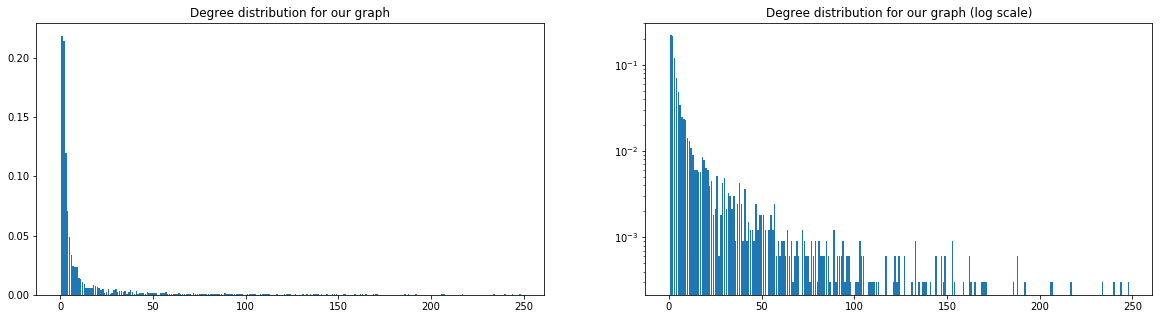

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar([x for x in range(len(deg_dist_adj))], deg_dist_adj)
ax1.set_title('Degree distribution for our graph')
ax2.bar([x for x in range(len(deg_dist_adj))], deg_dist_adj, log=True)
ax2.set_title('Degree distribution for our graph (log scale)')
plt.show()

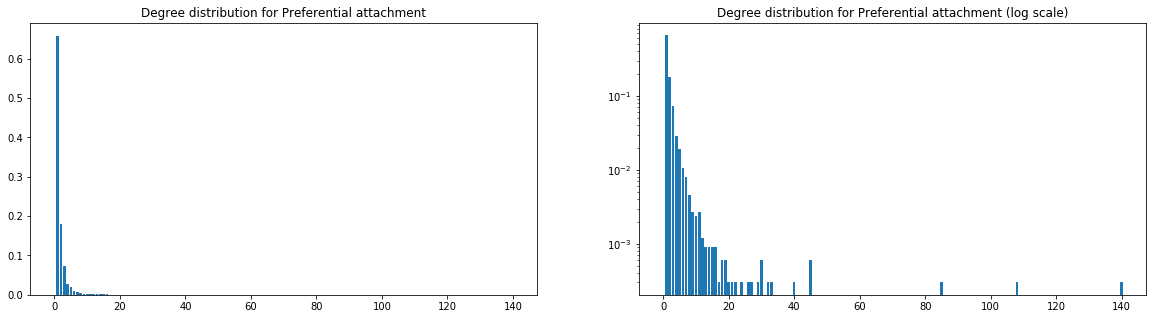

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.bar([x for x in range(len(deg_dist_pref))], deg_dist_pref)
ax1.set_title('Degree distribution for Preferential attachment')
ax2.bar([x for x in range(len(deg_dist_pref))], deg_dist_pref, log=True)
ax2.set_title('Degree distribution for Preferential attachment (log scale)')
plt.show()

In [32]:
#Normalize and put the degree distribution into bins
deg_dist_adj = normalize(adjacency, erdos=False)
deg_dist_pref = normalize(adjacency_pref, erdos=False)

#Compute the KL divergence
kl_div_pref = kl_divergence(deg_dist_adj, deg_dist_pref)

print('KL divergence between our graph and the Preferential Attachment model: ', kl_div_pref)

KL divergence between our graph and the Preferential Attachment model:  0.30219979863267027


Are the results what you expected? Explain.

***We get a degree distribution that also follows a power law, with another parameter. By computing the KL divergence, we see that we get small results, even smaller than the KL divergence when comparing with the BA model, which implies high similarity.***